<a href="https://colab.research.google.com/github/Vinichenko123/Group1-Data-Preprocessing/blob/main/Group_1_Data_Analysis_and_Engineering_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github link, you can use "save copy in github" in Files for commits
If you just joined, I've sent you an invite to the github through the same email that you're using for google colab
```
https://github.com/Vinichenko123/Group1-Data-Preprocessing.git
```



import pandas

In [163]:
# Load packages
import numpy as np
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

import the data, change numerical data that represents categories to string


In [164]:
data = pd.read_csv('dataset_grouped.csv', index_col='Client_ID')

#Fix spelling errors
data.rename(columns={
    'PI_Baisc Needs': 'PI_BasicNeeds',
    'PI_Refereal' : 'PI_Referral'
}, inplace=True)

data

,Unnamed: 0,Birth Date,Age,City,Province,Preferred_Language,Birth_Country,Year_of_Arrival_to_Canada,Years_in_Canada,Status_In_Canada,...,PI_Job_Seeker_Supports,PI_Mentoring,PI_Other,PI_SSM_Self-employment,PI_Academic_Upgrading,PI_Referral,PI_Resource_Digital-Services,PI_Retention,PI_Support_Changes_in_Work_Activities&supervision,Outcome_Return_to_Work
Client_ID,,,,,,,,,,,,,,,,,,,,,
100001,0,1998-01-23,26,Toronto,ON,French,Canada,Not applicable,26,Canadian citizen,...,0,0,0,0,1,0,0,0,0,0
100002,1,1960-09-16,63,Halifax,NS,French,Canada,Not applicable,63,Canadian citizen,...,0,0,0,0,0,0,0,0,0,1
100003,2,1977-03-11,46,St.John,NL,French,Canada,Not applicable,46,Canadian citizen,...,0,0,0,1,0,0,0,0,0,0
100004,3,1969-10-17,54,Quebec City,QC,English,Canada,Not applicable,54,Canadian citizen,...,0,0,0,0,1,1,0,0,0,0
100005,4,1972-05-01,51,Calgary,AB,English,Canada,Not applicable,51,Canadian citizen,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100096,95,1961-09-15,62,Edmonton,AB,English,China,2020,4,Refugee claimant,...,1,0,0,0,0,0,0,0,0,1
100097,96,1999-02-04,25,Montreal,QC,French,Canada,Not applicable,25,Canadian citizen,...,0,0,0,0,1,1,0,0,0,0
100098,97,1995-03-17,28,Quebec City,QC,English,Canada,Not applicable,28,Canadian citizen,...,0,0,0,0,0,0,0,0,0,0


In [165]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 100001 to 100100
Data columns (total 75 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Unnamed: 0                                         100 non-null    int64 
 1   Birth Date                                         100 non-null    object
 2   Age                                                100 non-null    int64 
 3   City                                               100 non-null    object
 4   Province                                           100 non-null    object
 5   Preferred_Language                                 100 non-null    object
 6   Birth_Country                                      100 non-null    object
 7   Year_of_Arrival_to_Canada                          100 non-null    object
 8   Years_in_Canada                                    100 non-null    int64 
 9   Status_In_Canada  

,Unnamed: 0,Age,Years_in_Canada,Number_of_Dependents,Education_Completion_Year,Language_Skills_Help,Writing_Skills,Verbal_Skills,Numerical_Skills,Computer_Skills,...,PI_Job_Seeker_Supports,PI_Mentoring,PI_Other,PI_SSM_Self-employment,PI_Academic_Upgrading,PI_Referral,PI_Resource_Digital-Services,PI_Retention,PI_Support_Changes_in_Work_Activities&supervision,Outcome_Return_to_Work
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00,...,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000
mean,49.500000,42.370000,35.490000,2.120000,1994.420000,0.160000,0.460000,0.630000,0.57000,0.55,...,0.230000,0.160000,0.0,0.130000,0.270000,0.200000,0.390000,0.0,0.050000,0.410000
std,29.011492,15.114148,18.485864,1.647036,15.631605,0.368453,0.500908,0.485237,0.49757,0.50,...,0.422953,0.368453,0.0,0.337998,0.446196,0.402015,0.490207,0.0,0.219043,0.494311
min,0.000000,18.000000,3.000000,0.000000,1967.000000,0.000000,0.000000,0.000000,0.00000,0.00,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,24.750000,27.750000,19.750000,1.000000,1982.000000,0.000000,0.000000,0.000000,0.00000,0.00,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,49.500000,43.500000,35.000000,2.000000,1993.000000,0.000000,0.000000,1.000000,1.00000,1.00,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,74.250000,55.250000,52.250000,3.000000,2007.000000,0.000000,1.000000,1.000000,1.00000,1.00,...,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,1.000000
max,99.000000,65.000000,65.000000,5.000000,2024.000000,1.000000,1.000000,1.000000,1.00000,1.00,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


Change date column to numeric

In [166]:
#Format the date column
data['Birth Date'] = pd.to_datetime(data['Birth Date'])

# Convert the date to the number of days using UNIX time
data['Birth Date'] = (data['Birth Date'] - pd.Timestamp('1970-01-01')).dt.total_seconds() / (24 * 60 * 60)


Fix null values

In [167]:
# Identify columns with missing values
missing_values = data.isnull().sum()

# Replace missing numbers with the mean
data_cleaned = data.fillna(data.mean(numeric_only=True))

# Double check all missing values
data_cleaned.isnull().sum()

,0
Unnamed: 0,0
Birth Date,0
Age,0
City,0
Province,0
...,...
PI_Referral,0
PI_Resource_Digital-Services,0
PI_Retention,0
PI_Support_Changes_in_Work_Activities&supervision,0


see best parameters for outcomeWork

In [168]:
#Convert categorical columns to numeric
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].astype('category').cat.codes

Scale the numerics so that large values in one column are treated equally to small numbers from another column

In [169]:
#Create scaler
scaler = StandardScaler()

numeric_columns = data_cleaned.select_dtypes(include=['int64']).columns

data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])

Ecncode Categorical data to check correspondence of each column to ReturnToWorkOutcome

In [170]:
# Assuming df is your DataFrame
categorical_columns = data_cleaned.select_dtypes(include=['O']).columns

# Apply one-hot encoding to categorical columns
data_cleaned_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns)

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data_cleaned[col + '_encoded'] = label_encoder.fit_transform(df[col])
    data_cleaned.drop(col, axis=1, inplace=True)  # Drop the original categorical column

data_cleaned

,Unnamed: 0,Birth Date,Age,City,Province,Preferred_Language,Birth_Country,Year_of_Arrival_to_Canada,Years_in_Canada,Status_In_Canada,...,PI_Job_Seeker_Supports,PI_Mentoring,PI_Other,PI_SSM_Self-employment,PI_Academic_Upgrading,PI_Referral,PI_Resource_Digital-Services,PI_Retention,PI_Support_Changes_in_Work_Activities&supervision,Outcome_Return_to_Work
Client_ID,,,,,,,,,,,,,,,,,,,,,
100001,-1.714816,10249.0,-1.088548,10,5,1,0,12,-0.515951,0,...,-0.546536,-0.436436,0.0,-0.386556,1.644294,-0.5,-0.79959,0.0,-0.229416,-0.833616
100002,-1.680173,-3394.0,1.371823,3,4,1,0,12,1.495661,0,...,-0.546536,-0.436436,0.0,-0.386556,-0.608164,-0.5,-0.79959,0.0,-0.229416,1.199593
100003,-1.645531,2626.0,0.241382,9,3,1,0,12,0.571407,0,...,-0.546536,-0.436436,0.0,2.586949,-0.608164,-0.5,-0.79959,0.0,-0.229416,-0.833616
100004,-1.610888,-76.0,0.773354,6,7,0,0,12,1.006350,0,...,-0.546536,-0.436436,0.0,-0.386556,1.644294,2.0,-0.79959,0.0,-0.229416,-0.833616
100005,-1.576245,851.0,0.573865,0,0,0,0,12,0.843246,0,...,1.829707,-0.436436,0.0,-0.386556,1.644294,-0.5,-0.79959,0.0,-0.229416,-0.833616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100096,1.576245,-3030.0,1.305326,2,0,0,1,10,-1.712046,5,...,1.829707,-0.436436,0.0,-0.386556,-0.608164,-0.5,-0.79959,0.0,-0.229416,1.199593
100097,1.610888,10626.0,-1.155044,4,7,1,0,12,-0.570319,0,...,-0.546536,-0.436436,0.0,-0.386556,1.644294,2.0,-0.79959,0.0,-0.229416,-0.833616
100098,1.645531,9206.0,-0.955555,6,7,0,0,12,-0.407216,0,...,-0.546536,-0.436436,0.0,-0.386556,-0.608164,-0.5,-0.79959,0.0,-0.229416,-0.833616


In [177]:
#show the correlated variables
correlated_data = data_cleaned.corr()['Outcome_Return_to_Work']
correlated_data


# Compute correlation matrix
correlation_matrix = data_cleaned.corr()

# Select correlations of features with the target variable
target_correlation = correlation_matrix['Outcome_Return_to_Work']

# Sort correlations in descending order
sorted_correlation = target_correlation.abs().sort_values(ascending=False).head(30)

print (sorted_correlation)


Outcome_Return_to_Work                1.000000
Education_Level                       0.203617
PI_Mentoring                          0.197439
PI_Job_Seeker_Supports                0.172481
Immediate_Assistance_Need             0.166350
Physical_disability                   0.164116
months_since_last_job                 0.157204
Number_of_Dependents                  0.147890
Currently_Working                     0.132648
PI_Employer                           0.129126
Food_Insecurity                       0.126188
Housing_Situation                     0.118556
Housing_help                          0.116910
PI_Community_Support                  0.108466
Computer_Skills                       0.104216
Hours_available_to_work               0.099476
Mental_Health_Condition               0.099146
Status_In_Canada                      0.097916
Numerical_Skills                      0.097333
PI_Employability_Skills_Training      0.094545
Work_duration                         0.093245
Source_of_Inc

See correlation of variables

Exploratory Data Analysis EDA

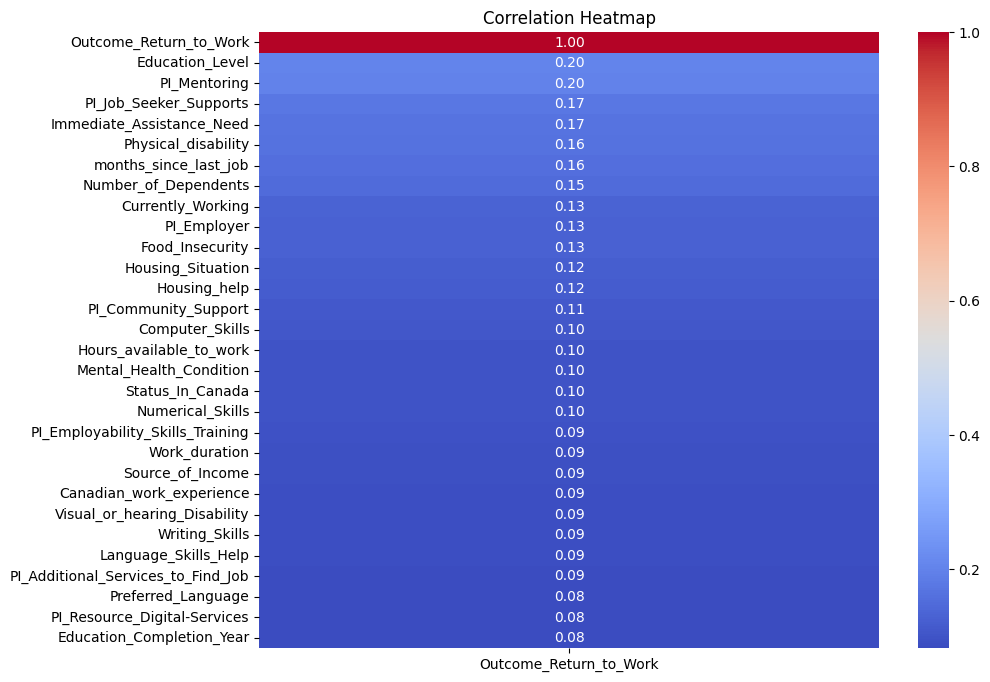

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert sorted_correlation to a DataFrame
sorted_correlation_data_cleaned = sorted_correlation.to_frame()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_correlation_data_cleaned, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [179]:
# Extract the names of the top correlated features
top_features_names = sorted_correlation.index

# Keep only the top correlated features in your DataFrame
data_cleaned_top_correlated = data_cleaned[top_features_names]

data_cleaned_top_correlated

,Outcome_Return_to_Work,Education_Level,PI_Mentoring,PI_Job_Seeker_Supports,Immediate_Assistance_Need,Physical_disability,months_since_last_job,Number_of_Dependents,Currently_Working,PI_Employer,...,Work_duration,Source_of_Income,Canadian_work_experience,Visual_or_hearing_Disability,Writing_Skills,Language_Skills_Help,PI_Additional_Services_to_Find_Job,Preferred_Language,PI_Resource_Digital-Services,Education_Completion_Year
Client_ID,,,,,,,,,,,,,,,,,,,,,
100001,-0.833616,7,-0.436436,-0.546536,-0.980196,-0.314485,-0.722295,1.147195,1.175139,-0.577350,...,-0.561304,5,-1.393261,-0.922958,-0.922958,2.291288,-1.020204,1,-0.79959,0.808834
100002,1.199593,11,-0.436436,-0.546536,-0.980196,-0.314485,-0.722295,-0.683435,1.175139,-0.577350,...,1.700880,0,0.717741,1.083473,-0.922958,2.291288,0.980196,1,-0.79959,-1.184318
100003,-0.833616,8,-0.436436,-0.546536,-0.980196,-0.314485,-0.106703,-1.293645,-0.850963,-0.577350,...,0.805432,1,-1.393261,-0.922958,-0.922958,-0.436436,0.980196,1,-0.79959,-0.155594
100004,-0.833616,4,-0.436436,-0.546536,1.020204,-0.314485,-0.722295,0.536985,1.175139,-0.577350,...,-0.985464,6,0.717741,-0.922958,-0.922958,-0.436436,0.980196,0,-0.79959,-0.991433
100005,-0.833616,6,-0.436436,1.829707,1.020204,-0.314485,-0.722295,-0.073225,1.175139,-0.577350,...,-0.749820,6,0.717741,-0.922958,1.083473,-0.436436,-1.020204,0,-0.79959,-0.669956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100096,1.199593,7,-0.436436,1.829707,-0.980196,-0.314485,0.714087,-0.683435,-0.850963,1.732051,...,2.266426,5,-1.393261,-0.922958,-0.922958,-0.436436,-1.020204,0,-0.79959,-1.570090
100097,-0.833616,5,-0.436436,-0.546536,1.020204,-0.314485,-0.722295,-0.683435,1.175139,1.732051,...,-0.985464,0,-1.393261,1.083473,-0.922958,-0.436436,0.980196,1,-0.79959,1.001720
100098,-0.833616,2,-0.436436,-0.546536,-0.980196,-0.314485,-0.722295,1.147195,1.175139,-0.577350,...,-0.891206,6,0.717741,-0.922958,1.083473,2.291288,-1.020204,0,-0.79959,0.873129


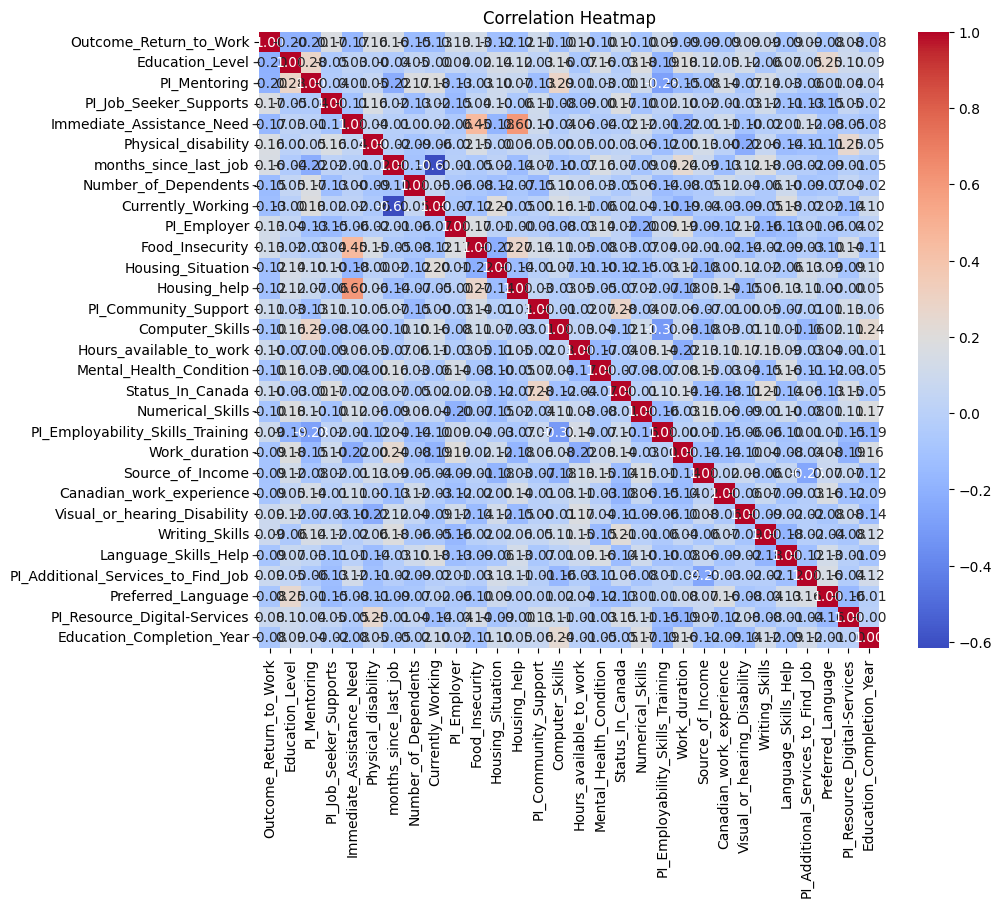

In [180]:
# Correlation heatmap

data_cleaned_top_correlated_matrix = data_cleaned_top_correlated.corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned_top_correlated_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Color only

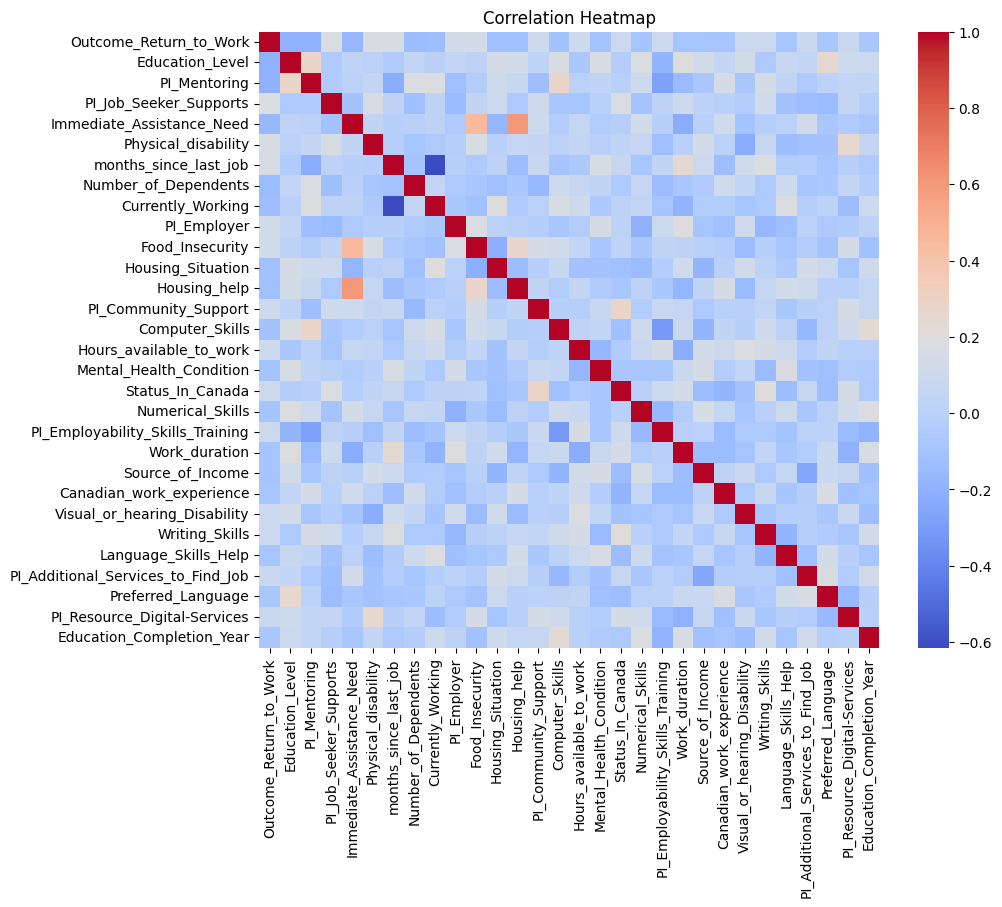

In [184]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned_top_correlated_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [186]:
print(data_cleaned_top_correlated.columns)


Index(['Outcome_Return_to_Work', 'Education_Level', 'PI_Mentoring',
       'PI_Job_Seeker_Supports', 'Immediate_Assistance_Need',
       'Physical_disability', 'months_since_last_job', 'Number_of_Dependents',
       'Currently_Working', 'PI_Employer', 'Food_Insecurity',
       'Housing_Situation', 'Housing_help', 'PI_Community_Support',
       'Computer_Skills', 'Hours_available_to_work', 'Mental_Health_Condition',
       'Status_In_Canada', 'Numerical_Skills',
       'PI_Employability_Skills_Training', 'Work_duration', 'Source_of_Income',
       'Canadian_work_experience', 'Visual_or_hearing_Disability',
       'Writing_Skills', 'Language_Skills_Help',
       'PI_Additional_Services_to_Find_Job', 'Preferred_Language',
       'PI_Resource_Digital-Services', 'Education_Completion_Year'],
      dtype='object')
